**<h3> Introdução: Keras para Deep Learning </h3>**

----

É uma framework high-level API para o desenvolvimento de modelos de Deep Learning. Trata-se de uma biblioteca grátis de Deep Learning, permitindo a rápida experimentação de redes neurais. Em Keras, podemos desenvolver modelos de rápida aplicação, com muito menos código e sendo capaz de construir qualquer tipo de arquitetura de rede: convolucionais, recorrentes e etc.. Keras pode ser utilizada em inúmeros dispositivos, já que pode ser importada para android, ios e outros sistemas operacionais. 

Keras foi construída em cima da **bibliotecas Tensorflow, Theano e CNTK**.

Geralmente se utilizam redes neurais com problemas onde dados não apresentam-se facilmente estruturados (em tabelas) e  quando não necessitamos interpretar ou saber os "porquês" do modelo. 

De maneira simplista, uma rede neural é um algoritmo de machine learning onde as variáveis "independentes"/Explanatórias/Features são dadas como input para uma camada de entrada. As camadas de uma rede neural são compostas de neurônios, onde os valores das variáveis são multiplicadas por um **peso**, adicionadas um **viés** e passadas como argumentos para uma **função de ativação**, resultando em um valor de saída que será **transmitido para os neurônios das próximas camadas.**  

Treinar uma rede neural consiste em determinar os pesos de cada uma das conexões que minimizem a função de custo global. Para se obter os pesos ideais, se utilizam algoritmos de otimização, como o **Stochastic Gradient Descend**. Keras permite a criação de modelos de redes neurais tanto pela utilização da **"Sequential" API ou da "Functional API"**.

- **Sequential API**: Constrói-se o modelo a partir de uma sequência de camadas. 


In [1]:
# Importando as bibliotecas

from keras.models import Sequential
from keras.layers import Dense 

# Instanciando o modelo sequencial novo: 

modelo = Sequential()

# Adicionando uma camada de input e uma camada oculta: 

modelo.add(Dense(2,activation = 'relu', input_shape = (3,)))
modelo.add(Dense(1))

# Sumário do modelo:

# A primeira camada (de inputs) não é especificada no sumário,
# sendo que é condensada na primeira camada oculta (por essa razão,
# essa primeira possui parâmetros adicionais)

modelo.summary()

# 8 Parâmetros: 6 pesos sinápticos e 2 Bias/Vies 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 8         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


**Compilando o Modelo**: Antes de gerarmos previsões com nossos modelos, devemos compilá-los, fornecendo uma função de otimização e uma função de perde que gostaremos de minimizar durante o treinamento do modelo. 

**Treinando o Modelo:** Visa ajustar os parâmetros desconhecidos da rede neural de forma a minimizar o erro cometido, mensurado pela função de perda. O treinamento é dado por meio de *Epochs*. Uma *Epoch* corresponde ao algoritmo percorrer todas as observções de treino disponíveis 

> model.fit(X_train, Y_train, epochs = 5)

In [2]:
# Compinando o Modelo: 
modelo.compile(optimizer = 'adam', loss = 'mse')

**Realizando Predições:** para gerar predições utilizando sua rede neural, utiliza-se o método ***.predict*** do objeto modelo. Para realizarmos uma **Avaliação** dos resultados das predições, utilizamos **.evaluate**.

> modelo.predict(X_teste) \
> modelo.evaluate(X_teste,y_teste)

<h3> <b> Problema de Classificação Binária  </b> </h3>

----

Para inspecionarmos, de maneira fácil, um dataset de classificação binária (onde as respostas são dadas por 0 ou 1), podemos utilizar o método **pairplot** da biblioteca _seaborn_. Em problemas de classificação binária, utilizamos [**binary crossentropy ou log loss**](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) como a função de perda. Modelos de classificação tem como resposta uma probabilidade da observação pertencer a determinada classe. A tarefa da função de perda é **nos indicar se a performance do modelo está apropriada para a classificação** das observações. 

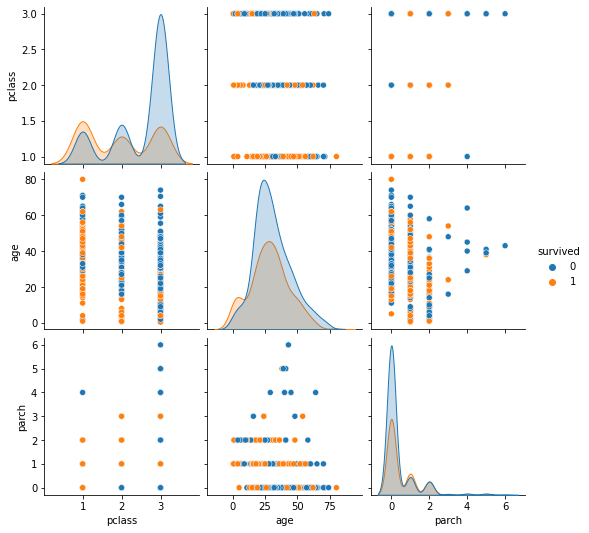

In [9]:
# importando a biblioteca: 
import seaborn as sns
import matplotlib.pyplot as plt

# Carregandos os dados de exemplo de 
# classificação binária (Titanic)
Dados_Titanic = sns.load_dataset('titanic')[['survived', 'pclass', 'age','parch']]

# criando o pairplot: 
sns.pairplot(Dados_Titanic, hue = 'survived')
plt.show()


In [27]:
# Importando os pacotes
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense 

# Tratamento dos Dados

# Removendo NaNs
Dados_Titanic = Dados_Titanic.dropna()

# Definindo as features
entradas = np.array(Dados_Titanic[['pclass', 'age','parch']])
alvo = np.array(Dados_Titanic['survived'])

# Segmentando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(entradas, alvo, test_size=0.33, random_state=42)


In [47]:
# Outra Métrica util: 
from keras.metrics import BinaryAccuracy

# Instanciando o Modelo
Model_Titanic = Sequential()
Model_Titanic.add(Dense(5, activation='sigmoid', input_shape = (3,)))
Model_Titanic.add(Dense(3, activation='sigmoid', input_shape = (5,)))
Model_Titanic.add(Dense(1, activation='sigmoid', input_shape = (3,)))
Model_Titanic.compile(loss = 'binary_crossentropy', optimizer= 'sgd', 
metrics=['accuracy', BinaryAccuracy(threshold=.95)])
Model_Titanic.summary()

# Para adicionar um threshhold personalizado para o classificador binário, utilizamos a classe
# BinaryAccuracy de Keras. 


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 5)                 20        
                                                                 
 dense_27 (Dense)            (None, 3)                 18        
                                                                 
 dense_28 (Dense)            (None, 1)                 4         
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Treinando o Modelo: 
Model_Titanic.fit(X_train,y_train, epochs= 20)


Epoch 1/20
15/15 [==============================] - 0s 1ms/step - loss: 0.6711 - accuracy: 0.6004 - binary_accuracy: 0.6004
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.6004 - binary_accuracy: 0.6004
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.6004 - binary_accuracy: 0.6004
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.6004 - binary_accuracy: 0.6004
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.6004 - binary_accuracy: 0.6004
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 0.6695 - accuracy: 0.6004 - binary_accuracy: 0.6004
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 0.6694 - accuracy: 0.6004 - binary_accuracy: 0.6004
Epoch 8/20
15/15 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.6004 - binary_accuracy: 0.6004
Epoch 9/

In [49]:
# Avaliando o Modelo [Loss, accuracy]:
Model_Titanic.evaluate(X_test,y_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.6788 - accuracy: 0.5805 - binary_accuracy: 0.5805


[0.6788325309753418, 0.5805084705352783, 0.5805084705352783]

<h3> <b> Problema de Classificação com Múltiplas Classes  </b> </h3>

----

Tratam-se de problemas onde as observações podem ser advindas de 3 ou mais classes distintas em relação a uma variável. O algortimo de classificação via Keras é só levemente alterado na camada de saída, de forma que o número de saídas se iguale ao número de classes. A resposta será a **probabilidade prevista da observação pertencer a cada uma das classes**, ou seja, a soma do vetor de saída sempre será 1. Esse comportamento é obetido pela função de ativação do tipo ***'softmax'***. Outra alteração é que substituímos a função de perda de ***'Binary Cross-Entropy' para 'Categorical Cross-Entropy'***.

> Modelo_Multiplo.add ( Dense ( Número de classes , activation = 'softmax' ) ) \
> Modelo_Multiplo.add ( optimizer = 'adam' , loss = 'categorical_crossentropy' )

Uma outra diferença que devemos nos atentar é que devemos realizar a categorização das nossa variável de resposta. Para isso, nos provemos dos métodos **to_categorical** do **keras.utils** e do método **pandas.Categorical** de **pandas**. 

&nbsp;

In [61]:
# Exemplo de Hot-Encoding usando Keras: 
import pandas as pd
from tensorflow.keras.utils import to_categorical

Competidores = pd.read_csv('Dardos.csv')
Competidores[['competitor']].head()


,competitor
0,Steve
1,Susan
2,Michael
3,Kate
4,Steve


In [65]:
Competidores.competitor = pd.Categorical(Competidores.competitor)   # Converte coluna em variável categórica
Competidores.competitor = Competidores.competitor.cat.codes         # Categorias como números
print(to_categorical(Competidores.competitor))


[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
